### Data and Collection of Data

For this particular project, we have collected some information on the crime rate from 2014 to 2019 in Toronto

### Based on our problem, some factors should be taken into account in order to take the good decision are listed below:

1. Figure out the safest borough based on Toronto Crime Rate.
2. Discover the optimal common venues and select the appropriate neighbourhood within the borough.

## We will treat the geographical data about Toronto in order to plot the corresponding neighbourhoods which are considered as safe and secure for the opening of a new restaurant.


The following dataset which is Toronto Crime rate (https://www.kaggle.com/alincijov/toronto-crime-rate-per-neighbourhood) is analysing.

Toronto Neighbourhoods Boundary File includes 2014-2019 Crime Data by Neighbourhood. Counts are available for Assault, Auto Theft, Break and Enter, Robbery, Theft Over and Homicide. Data also includes four year averages and crime rates per 100,000 people by neighbourhood based on 2016 Census Population.

In this project, we extract data from the following data sources:
1. Toronto Crime rate (https://www.kaggle.com/alincijov/toronto-crime-rate-per-neighbourhood)
2. Restaurants data in every neighborhood will be obtained using Foursquare API
3. Google Geocoding API will be used to center the hexagon neighborhood.


In [1]:
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # conversion an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 


from IPython.display import display_html
import pandas as pd
import numpy as np


import requests # library to handle requests
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans


!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


### Reading from the Dataset
We proceed to the Toronto Dataset with the recent crime report from 2008 to 2019.


In [2]:
!pip install lxml
import lxml
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
df = pd.read_html(url, header=0)
df = df[0]
df.head()



,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [3]:
# Dropping the rows where Borough is 'Not assigned'
df = df[df.Borough != 'Not assigned']

# Combining the neighbourhoods with same Postalcode
df = df.groupby(['Postal Code','Borough'], sort=False).agg(', '.join)
df.reset_index(inplace=True)

# Replacing the name of the neighbourhoods which are 'Not assigned' with names of Borough
df['Neighbourhood'] = np.where(df['Neighbourhood'] == 'Not assigned',df['Borough'], df['Neighbourhood'])

df.shape
df.head()

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [4]:
#Importing the csv file conatining the latitudes and longitudes for various neighbourhoods in Canada
latitude_longitude = pd.read_csv('https://cocl.us/Geospatial_data')
latitude_longitude.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


### Merging the two tables for getting the Latitudes and Longitudes for various neighbourhoods in Canada

In [5]:
latitude_longitude.rename(columns={'Postal Code':'Postal Code'},inplace=True)
df = pd.merge(df,latitude_longitude,on='Postal Code')
df

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


### Merging the three tables for getting the Neighbourhood with the crime Rate 




In [6]:
toronto_Crime_df = pd.read_csv('https://raw.githubusercontent.com/Ellis0312/The-Battle-of-Neighborhoods/main/Neighbourhood_Crime_Rates.csv',index_col='OBJECTID')
toronto_Crime_df.drop(['Assault_2014','Assault_2015','Assault_2016','Assault_2017','Assault_2018','Assault_2019','Assault_AVG','Assault_CHG','AutoTheft_2014','AutoTheft_2015','AutoTheft_2016','AutoTheft_2017','AutoTheft_2018','AutoTheft_2019','AutoTheft_AVG','AutoTheft_CHG','BreakandEnter_2014','BreakandEnter_2015','BreakandEnter_2016','BreakandEnter_2017','BreakandEnter_2018','BreakandEnter_2019','BreakandEnter_AVG','BreakandEnter_CHG','Homicide_2014','Homicide_2015','Homicide_2016','Homicide_2017','Homicide_2018','Homicide_2019','Homicide_CHG','Homicide_AVG','Robbery_2014','Robbery_2015', 'Robbery_2016','Robbery_2017','Robbery_2018','Robbery_2019','Robbery_AVG','Robbery_CHG','TheftOver_2014','TheftOver_2015','TheftOver_2016','TheftOver_2017','TheftOver_2018','TheftOver_2019','TheftOver_AVG','TheftOver_CHG','Shape__Area','Shape__Length'], axis = 1, inplace = True)
toronto_Crime_df
map_toronto_df = pd.merge(df,toronto_Crime_df,on='Neighbourhood')
map_toronto_df


,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Hood_ID,Population,Assault_Rate_2019,AutoTheft_Rate_2019,BreakandEnter_Rate_2019,Homicide_Rate_2019,Robbery_Rate_2019,TheftOver_Rate_2019
0,M4A,North York,Victoria Village,43.725882,-79.315572,43,17510,753.9,102.8,342.7,5.7,80.0,28.6
1,M6C,York,Humewood-Cedarvale,43.693781,-79.428191,106,14365,320.2,111.4,181.0,0.0,69.6,27.8
2,M4E,East Toronto,The Beaches,43.676357,-79.293031,63,21567,375.6,92.7,264.3,0.0,74.2,41.7
3,M1G,Scarborough,Woburn,43.770992,-79.216917,137,53485,798.4,112.2,187.0,0.0,125.3,15.0
4,M2H,North York,Hillcrest Village,43.803762,-79.363452,48,16934,407.5,159.4,212.6,5.9,94.5,35.4
5,M4H,East York,Thorncliffe Park,43.705369,-79.349372,55,21108,544.8,61.6,127.9,0.0,61.6,23.7
6,M1J,Scarborough,Scarborough Village,43.744734,-79.239476,139,16724,1046.4,107.6,239.2,0.0,167.4,12.0
7,M2K,North York,Bayview Village,43.786947,-79.385975,52,21396,308.5,172.9,172.9,0.0,65.4,60.8
8,M9L,North York,Humber Summit,43.756303,-79.565963,21,12416,950.4,1087.3,459.1,24.2,225.5,177.2
9,M9N,York,Weston,43.706876,-79.518188,113,17992,1089.4,272.3,322.4,11.1,144.5,22.2


After Data Cleaning of these datasets, we perform the total crime rate in the different types of crime

In [7]:
#  Calulating the sum of the all crimes committed and Sorting the data

crime_toronto_total = pd.concat([map_toronto_df,pd.DataFrame(map_toronto_df[["Assault_Rate_2019", "AutoTheft_Rate_2019", "BreakandEnter_Rate_2019","Homicide_Rate_2019","Robbery_Rate_2019","TheftOver_Rate_2019"]].sum(axis=1),columns=['Total'])],axis=1)
crime_toronto_total


,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Hood_ID,Population,Assault_Rate_2019,AutoTheft_Rate_2019,BreakandEnter_Rate_2019,Homicide_Rate_2019,Robbery_Rate_2019,TheftOver_Rate_2019,Total
0,M4A,North York,Victoria Village,43.725882,-79.315572,43,17510,753.9,102.8,342.7,5.7,80.0,28.6,1313.7
1,M6C,York,Humewood-Cedarvale,43.693781,-79.428191,106,14365,320.2,111.4,181.0,0.0,69.6,27.8,710.0
2,M4E,East Toronto,The Beaches,43.676357,-79.293031,63,21567,375.6,92.7,264.3,0.0,74.2,41.7,848.5
3,M1G,Scarborough,Woburn,43.770992,-79.216917,137,53485,798.4,112.2,187.0,0.0,125.3,15.0,1237.9
4,M2H,North York,Hillcrest Village,43.803762,-79.363452,48,16934,407.5,159.4,212.6,5.9,94.5,35.4,915.3
5,M4H,East York,Thorncliffe Park,43.705369,-79.349372,55,21108,544.8,61.6,127.9,0.0,61.6,23.7,819.6
6,M1J,Scarborough,Scarborough Village,43.744734,-79.239476,139,16724,1046.4,107.6,239.2,0.0,167.4,12.0,1572.6
7,M2K,North York,Bayview Village,43.786947,-79.385975,52,21396,308.5,172.9,172.9,0.0,65.4,60.8,780.5
8,M9L,North York,Humber Summit,43.756303,-79.565963,21,12416,950.4,1087.3,459.1,24.2,225.5,177.2,2923.7
9,M9N,York,Weston,43.706876,-79.518188,113,17992,1089.4,272.3,322.4,11.1,144.5,22.2,1861.9


Sorting the data in order to get the neighbourhood with the top 5 highest crime rate

In [8]:
# Sorting the data with the highest rate top 5

crime_toronto_total.sort_values(['Total'], ascending = False, axis = 0, inplace = True )

crime_toronto_top5 = crime_toronto_total.iloc[1:6]
crime_toronto_top5

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Hood_ID,Population,Assault_Rate_2019,AutoTheft_Rate_2019,BreakandEnter_Rate_2019,Homicide_Rate_2019,Robbery_Rate_2019,TheftOver_Rate_2019,Total
9,M9N,York,Weston,43.706876,-79.518188,113,17992,1089.4,272.3,322.4,11.1,144.5,22.2,1861.9
6,M1J,Scarborough,Scarborough Village,43.744734,-79.239476,139,16724,1046.4,107.6,239.2,0.0,167.4,12.0,1572.6
0,M4A,North York,Victoria Village,43.725882,-79.315572,43,17510,753.9,102.8,342.7,5.7,80.0,28.6,1313.7
3,M1G,Scarborough,Woburn,43.770992,-79.216917,137,53485,798.4,112.2,187.0,0.0,125.3,15.0,1237.9
4,M2H,North York,Hillcrest Village,43.803762,-79.363452,48,16934,407.5,159.4,212.6,5.9,94.5,35.4,915.3


Bar charts Visualization of the top 5 highest crime rate

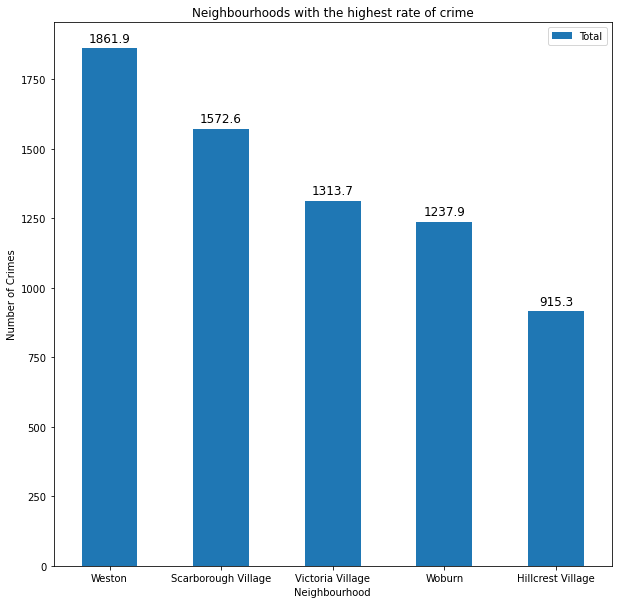

In [9]:
import matplotlib.pyplot as plt

crime_neighbourhood = crime_toronto_top5[['Neighbourhood','Total']]

crime_neighbourhood.set_index('Neighbourhood',inplace = True)

ax_x_y = crime_neighbourhood.plot(kind='bar', figsize=(10, 10), rot = 0)

ax_x_y .set_title('Neighbourhoods with the highest rate of crime')
ax_x_y .set_ylabel('Number of Crimes')
ax_x_y .set_xlabel('Neighbourhood')

for t in ax_x_y.patches:
    ax_x_y.annotate(np.round(t.get_height(),decimals=2), 
                (t.get_x()+t.get_width()/2., t.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 12,
               )

plt.show()

Sorting the data in order to get the neighbourhood with the top 5 lowest crime rate

In [10]:
crime_toronto_total.sort_values(['Total'], ascending = True, axis = 0, inplace = True )

crime_toronto_top5_low = crime_toronto_total.iloc[1:6]
crime_toronto_top5_low

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Hood_ID,Population,Assault_Rate_2019,AutoTheft_Rate_2019,BreakandEnter_Rate_2019,Homicide_Rate_2019,Robbery_Rate_2019,TheftOver_Rate_2019,Total
7,M2K,North York,Bayview Village,43.786947,-79.385975,52,21396,308.5,172.9,172.9,0.0,65.4,60.8,780.5
5,M4H,East York,Thorncliffe Park,43.705369,-79.349372,55,21108,544.8,61.6,127.9,0.0,61.6,23.7,819.6
2,M4E,East Toronto,The Beaches,43.676357,-79.293031,63,21567,375.6,92.7,264.3,0.0,74.2,41.7,848.5
4,M2H,North York,Hillcrest Village,43.803762,-79.363452,48,16934,407.5,159.4,212.6,5.9,94.5,35.4,915.3
3,M1G,Scarborough,Woburn,43.770992,-79.216917,137,53485,798.4,112.2,187.0,0.0,125.3,15.0,1237.9


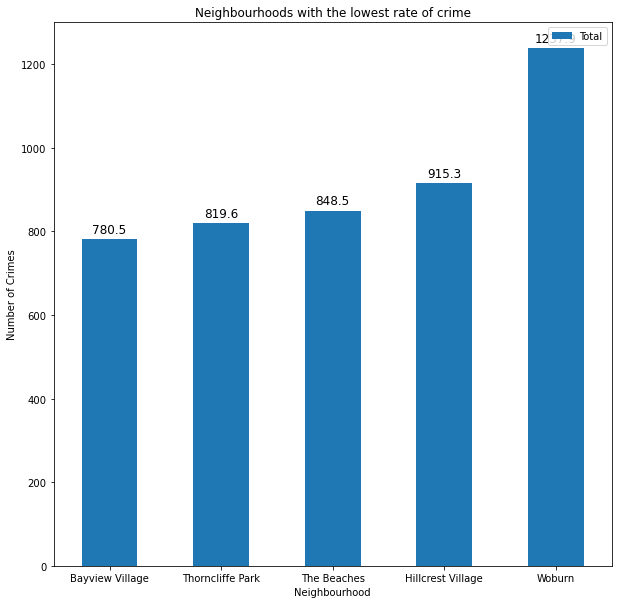

In [11]:
import matplotlib.pyplot as plt

crime_neighbourhood = crime_toronto_top5_low[['Neighbourhood','Total']]

crime_neighbourhood.set_index('Neighbourhood',inplace = True)

ax_x_y = crime_neighbourhood.plot(kind='bar', figsize=(10, 10), rot = 0)

ax_x_y .set_title('Neighbourhoods with the lowest rate of crime')
ax_x_y .set_ylabel('Number of Crimes')
ax_x_y .set_xlabel('Neighbourhood')

for t in ax_x_y.patches:
    ax_x_y.annotate(np.round(t.get_height(),decimals=2), 
                (t.get_x()+t.get_width()/2., t.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 12,
               )

plt.show()

In [12]:
#Visualizing all the Neighbourhoods of the above data frame using Folium

map_toronto = folium.Map(location=[43.651070,-79.347015],zoom_start=10)

for lat,lng,borough,neighbourhood in zip(map_toronto_df['Latitude'],map_toronto_df['Longitude'],map_toronto_df['Borough'],map_toronto_df['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_toronto)
map_toronto


After analysis of the top 5 lowest crime rate, East York Borough is considered to be the safest place for the establishment of a new restaurant

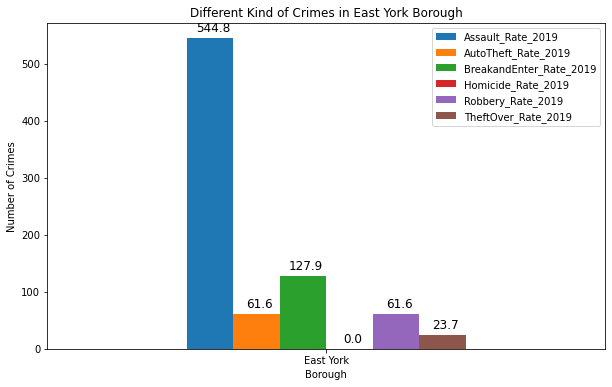

In [13]:
East_York_df = crime_toronto_total[crime_toronto_total['Borough'] == 'East York']

East_York_df = East_York_df.sort_values(['Total'], ascending = True, axis = 0)

East_York = East_York_df[['Borough','Assault_Rate_2019', 'AutoTheft_Rate_2019','BreakandEnter_Rate_2019','Homicide_Rate_2019','Robbery_Rate_2019',
                 'TheftOver_Rate_2019']]


East_York.set_index('Borough',inplace = True)

ax_x_y = East_York.plot(kind='bar', figsize=(10, 6), rot=0)

ax_x_y.set_title('Different Kind of Crimes in East York Borough')
ax_x_y.set_ylabel('Number of Crimes')
ax_x_y.set_xlabel('Borough')

for t in ax_x_y.patches:
    ax_x_y.annotate(np.round(t.get_height(),decimals=2), 
                (t.get_x()+t.get_width()/2.,t.get_height()), 
                ha='center', 
                va='center', 
                xytext=(3, 10), 
                textcoords='offset points',
                fontsize = 12
               )
    ax_x_y.legend(loc='upper right')

plt.show()

We want to have an interactive map of the East York Borough

In [14]:
df = df[df['Borough'].str.contains('East York',regex=False)]
#Visualizing all the Neighbourhoods of the above data frame using Folium

map_toronto = folium.Map(location=[43.651070,-79.347015],zoom_start=10)

for lat,lng,borough,neighbourhood in zip(df['Latitude'],df['Longitude'],df['Borough'],df['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_toronto)
map_toronto

Using Foursquare API to get the venue names near the different neighbourhood of East York

In [15]:
CLIENT_ID = 'XVY0YGK3DX5QGHMN2TGSK2EWA55P3JNPIVC5QVW5SGIGUI2L'
CLIENT_SECRET = 'T53Z3HT4W5DVALRIPBK2DPD4NFOCISMUTMNBLNW13KEJTAIJ'
VERSION = '20191101'
LIMIT = 100


def nearbyVenuesNeigh(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for venue_name, venue_latitude, venue_longtitude in zip(names, latitudes, longitudes):
        print(venue_name)
            
        # use Foursquare API
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION,venue_latitude, venue_longtitude, radius, LIMIT)
            
        # GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # get information for each nearby venue
        venues_list.append([(
            venue_name, 
            venue_latitude, 
            venue_longtitude, 
            i['venue']['name'], 
            i['venue']['categories'][0]['name']) for i in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Category']
    
    return(nearby_venues)

In [16]:
east_York_venues = nearbyVenuesNeigh(names=df['Neighbourhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Parkview Hill, Woodbine Gardens
Woodbine Heights
Leaside
Thorncliffe Park
East Toronto, Broadview North (Old East York)


Get the near by venue of  East York

In [17]:
east_York_venues

,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category
0,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937,Jawny Bakers,Gastropub
1,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937,Toronto Climbing Academy,Rock Climbing Spot
2,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937,East York Gymnastics,Gym / Fitness Center
3,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937,Muddy York Brewing Co.,Brewery
4,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937,Peek Freans Cookie Outlet,Bakery
...,...,...,...,...,...
244,"East Toronto, Broadview North (Old East York)",43.685347,-79.338106,Raj Kapuri Paan & Snacks,Indian Restaurant
245,"East Toronto, Broadview North (Old East York)",43.685347,-79.338106,Pape Flower Market,Flower Shop
246,"East Toronto, Broadview North (Old East York)",43.685347,-79.338106,Phyllo Cafe,Pastry Shop
247,"East Toronto, Broadview North (Old East York)",43.685347,-79.338106,Pie in the Sky Studios,Performing Arts Venue


Regrouping the neighbourhood together

In [18]:
east_York_venues.groupby('Neighbourhood').count().drop(['Neighborhood Latitude','Neighborhood Longitude'], axis = 1)

,Venue,Venue Category
Neighbourhood,,
"East Toronto, Broadview North (Old East York)",95,95
Leaside,59,59
"Parkview Hill, Woodbine Gardens",19,19
Thorncliffe Park,49,49
Woodbine Heights,27,27


In [19]:
nearby_venues_unique = east_York_venues['Venue Category'].value_counts().to_frame(name='Count')
nearby_venues_unique.head(5)

,Count
Coffee Shop,20
Café,9
Greek Restaurant,9
Pizza Place,8
Sandwich Place,7


Getting the venue of all restaurants in East York

In [20]:

east_york_Restaurant= east_York_venues[east_York_venues['Venue Category'].str.contains('Restaurant',regex=False)]
east_york_Restaurant

,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category
7,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937,Harvey's,Fast Food Restaurant
27,Woodbine Heights,43.695344,-79.318389,Little Coxwell Restaurant,Thai Restaurant
41,Woodbine Heights,43.695344,-79.318389,Thai Fusion,Thai Restaurant
44,Woodbine Heights,43.695344,-79.318389,Kouzina,Greek Restaurant
56,Leaside,43.709060,-79.363452,The Leaside Pub,Restaurant
60,Leaside,43.709060,-79.363452,Kintako Japanese Restaurant,Sushi Restaurant
75,Leaside,43.709060,-79.363452,Mt Everest Restaurant,Indian Restaurant
91,Leaside,43.709060,-79.363452,Mucho Burrito Fresh Mexican Grill,Mexican Restaurant
96,Leaside,43.709060,-79.363452,Select Sandwich,Restaurant
99,Leaside,43.709060,-79.363452,San Francesco,Italian Restaurant


Analyze Each Neighbourhood

In [21]:
# one hot encoding
east_york_onehot = pd.get_dummies(east_york_Restaurant[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
east_york_onehot['Neighbourhood'] = east_york_Restaurant['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [east_york_onehot.columns[-1]] + list(east_york_onehot.columns[:-1])
east_york_onehot =east_york_onehot[fixed_columns]

east_york_onehot.head()

,Neighbourhood,Afghan Restaurant,American Restaurant,Asian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Ethiopian Restaurant,Fast Food Restaurant,Greek Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Ramen Restaurant,Restaurant,Sushi Restaurant,Thai Restaurant,Turkish Restaurant,Vietnamese Restaurant
7,"Parkview Hill, Woodbine Gardens",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
27,Woodbine Heights,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
41,Woodbine Heights,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
44,Woodbine Heights,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
56,Leaside,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [22]:
east_york_grouped = east_york_onehot.groupby('Neighbourhood').mean().reset_index()
east_york_grouped

,Neighbourhood,Afghan Restaurant,American Restaurant,Asian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Ethiopian Restaurant,Fast Food Restaurant,Greek Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Ramen Restaurant,Restaurant,Sushi Restaurant,Thai Restaurant,Turkish Restaurant,Vietnamese Restaurant
0,"East Toronto, Broadview North (Old East York)",0.000000,0.068966,0.034483,0.034483,0.034483,0.103448,0.103448,0.275862,0.034483,0.034483,0.000000,0.034483,0.068966,0.034483,0.034483,0.000000,0.034483,0.034483,0.034483
1,Leaside,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.142857,0.142857,0.142857,0.000000,0.000000,0.285714,0.142857,0.000000,0.000000,0.000000
2,"Parkview Hill, Woodbine Gardens",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Thorncliffe Park,0.153846,0.000000,0.076923,0.000000,0.000000,0.000000,0.076923,0.000000,0.230769,0.076923,0.000000,0.000000,0.153846,0.000000,0.076923,0.000000,0.000000,0.153846,0.000000
4,Woodbine Heights,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000


Get each neighborhood along with the top 5 most common venues

In [23]:
num_top_venues = 5

for hood in east_york_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = east_york_grouped[east_york_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----East Toronto, Broadview North (Old East York)----
                       venue  freq
0           Greek Restaurant  0.28
1       Ethiopian Restaurant  0.10
2       Fast Food Restaurant  0.10
3        American Restaurant  0.07
4  Middle Eastern Restaurant  0.07


----Leaside----
                 venue  freq
0           Restaurant  0.29
1   Italian Restaurant  0.14
2  Japanese Restaurant  0.14
3     Sushi Restaurant  0.14
4    Indian Restaurant  0.14


----Parkview Hill, Woodbine Gardens----
                  venue  freq
0  Fast Food Restaurant   1.0
1     Afghan Restaurant   0.0
2   Japanese Restaurant   0.0
3    Turkish Restaurant   0.0
4       Thai Restaurant   0.0


----Thorncliffe Park----
                       venue  freq
0          Indian Restaurant  0.23
1          Afghan Restaurant  0.15
2         Turkish Restaurant  0.15
3  Middle Eastern Restaurant  0.15
4       Fast Food Restaurant  0.08


----Woodbine Heights----
                 venue  freq
0      Thai Restaurant  0.67


In [24]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]



In [25]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = east_york_grouped['Neighbourhood']

for ind in np.arange(east_york_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(east_york_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"East Toronto, Broadview North (Old East York)",Greek Restaurant,Ethiopian Restaurant,Fast Food Restaurant,American Restaurant,Middle Eastern Restaurant,Vietnamese Restaurant,Indian Restaurant,Asian Restaurant,Chinese Restaurant,Dim Sum Restaurant
1,Leaside,Restaurant,Italian Restaurant,Sushi Restaurant,Mexican Restaurant,Japanese Restaurant,Indian Restaurant,Fast Food Restaurant,American Restaurant,Asian Restaurant,Chinese Restaurant
2,"Parkview Hill, Woodbine Gardens",Fast Food Restaurant,Vietnamese Restaurant,Indian Restaurant,American Restaurant,Asian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Ethiopian Restaurant,Greek Restaurant,Italian Restaurant
3,Thorncliffe Park,Indian Restaurant,Afghan Restaurant,Middle Eastern Restaurant,Turkish Restaurant,Asian Restaurant,Fast Food Restaurant,Italian Restaurant,Restaurant,Mexican Restaurant,Japanese Restaurant
4,Woodbine Heights,Thai Restaurant,Greek Restaurant,Vietnamese Restaurant,Indian Restaurant,American Restaurant,Asian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Ethiopian Restaurant,Fast Food Restaurant


K Means Clustering of the each neighbourhood

In [26]:
#k=5
#East_York_clustering = east_york_Restaurant.drop(['Venue','Venue Category','Neighbourhood'],1)
#kmeans = KMeans(n_clusters = k,random_state=0).fit(East_York_clustering)
#kmeans.labels_
#east_york_Restaurant.insert(0, 'Cluster Labels', kmeans.labels_)
#east_york_Restaurant

# set number of clusters
kclusters = 5

east_york_grouped_clustering = east_york_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(east_york_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 




array([3, 4, 2, 1, 0], dtype=int32)

In [27]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

east_york_merged = df

# match/merge SE London data with latitude/longitude for each neighborhood
east_york_merged_latlong = east_york_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on = 'Neighbourhood')
east_york_merged_latlong.head()


,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937,2,Fast Food Restaurant,Vietnamese Restaurant,Indian Restaurant,American Restaurant,Asian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Ethiopian Restaurant,Greek Restaurant,Italian Restaurant
14,M4C,East York,Woodbine Heights,43.695344,-79.318389,0,Thai Restaurant,Greek Restaurant,Vietnamese Restaurant,Indian Restaurant,American Restaurant,Asian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Ethiopian Restaurant,Fast Food Restaurant
23,M4G,East York,Leaside,43.709060,-79.363452,4,Restaurant,Italian Restaurant,Sushi Restaurant,Mexican Restaurant,Japanese Restaurant,Indian Restaurant,Fast Food Restaurant,American Restaurant,Asian Restaurant,Chinese Restaurant
29,M4H,East York,Thorncliffe Park,43.705369,-79.349372,1,Indian Restaurant,Afghan Restaurant,Middle Eastern Restaurant,Turkish Restaurant,Asian Restaurant,Fast Food Restaurant,Italian Restaurant,Restaurant,Mexican Restaurant,Japanese Restaurant
35,M4J,East York,"East Toronto, Broadview North (Old East York)",43.685347,-79.338106,3,Greek Restaurant,Ethiopian Restaurant,Fast Food Restaurant,American Restaurant,Middle Eastern Restaurant,Vietnamese Restaurant,Indian Restaurant,Asian Restaurant,Chinese Restaurant,Dim Sum Restaurant


In [28]:
# create map

map_clusters = folium.Map(location=[43.651070,-79.347015],zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(east_york_merged_latlong['Latitude'], east_york_merged_latlong['Longitude'],east_york_merged_latlong['Neighbourhood'], east_york_merged_latlong['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


Analysis of the 5 clusters

In [29]:
east_york_merged_latlong.loc[east_york_merged_latlong['Cluster Labels'] == 0, east_york_merged_latlong.columns[[1] + list(range(5, east_york_merged_latlong.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,East York,0,Thai Restaurant,Greek Restaurant,Vietnamese Restaurant,Indian Restaurant,American Restaurant,Asian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Ethiopian Restaurant,Fast Food Restaurant


Cluster 2

In [30]:
east_york_merged_latlong.loc[east_york_merged_latlong['Cluster Labels'] == 1, east_york_merged_latlong.columns[[1] + list(range(5, east_york_merged_latlong.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,East York,1,Indian Restaurant,Afghan Restaurant,Middle Eastern Restaurant,Turkish Restaurant,Asian Restaurant,Fast Food Restaurant,Italian Restaurant,Restaurant,Mexican Restaurant,Japanese Restaurant


Cluster 3

In [31]:
east_york_merged_latlong.loc[east_york_merged_latlong['Cluster Labels'] == 2, east_york_merged_latlong.columns[[1] + list(range(5, east_york_merged_latlong.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,East York,2,Fast Food Restaurant,Vietnamese Restaurant,Indian Restaurant,American Restaurant,Asian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Ethiopian Restaurant,Greek Restaurant,Italian Restaurant


Cluster 4

In [32]:
east_york_merged_latlong.loc[east_york_merged_latlong['Cluster Labels'] == 3, east_york_merged_latlong.columns[[1] + list(range(5, east_york_merged_latlong.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
35,East York,3,Greek Restaurant,Ethiopian Restaurant,Fast Food Restaurant,American Restaurant,Middle Eastern Restaurant,Vietnamese Restaurant,Indian Restaurant,Asian Restaurant,Chinese Restaurant,Dim Sum Restaurant


Cluster 5

In [33]:
east_york_merged_latlong.loc[east_york_merged_latlong['Cluster Labels'] == 4, east_york_merged_latlong.columns[[1] + list(range(5, east_york_merged_latlong.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,East York,4,Restaurant,Italian Restaurant,Sushi Restaurant,Mexican Restaurant,Japanese Restaurant,Indian Restaurant,Fast Food Restaurant,American Restaurant,Asian Restaurant,Chinese Restaurant
